<a href="https://colab.research.google.com/github/kopalgarg/CSC2515/blob/main/HW2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns


Q2

In [158]:
# 2 a. Load the dataset
def load_data():
    boston = datasets.load_boston()
    X = boston.data
    y = boston.target
    features = boston.feature_names
    return X, y, features

In [404]:
# 2 b. Describe and summarize the data in terms of # data points, dimensions, target, etc.
def describe_data(X, y):
  print("Number of data points:", y.shape)
  print("Dimensions of the dataset", x.shape)

  # Plot the distribution of the target variable
  sns.displot(y, bins=30, kde=True);
  print("y min: {}, max: {}, mean: {}, stdev: {}".format(min(y), max(y),
                                                       np.mean(y), np.std(y)))
  
  f, ax = plt.subplots(figsize=(10, 8))
  # Plot the correlations matrix to display the linear relations between pairs of features
  merged = pd.DataFrame(X,columns=features)
  merged['MEDEV'] = y
  corr = merged.corr()

  sns.heatmap(corr, 
              cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [405]:
# 2.c

def visualize(X, y, features):
    plt.figure(figsize=(20, 5))
    feature_count = X.shape[1]

    # i: index
    for i in range(feature_count):
        plt.subplot(3, 5, i + 1)
        plt.scatter(X[:, i], y, marker='o')
        plt.title(features[i])
        plt.xlabel(features[i])
        plt.ylabel('MEDEV')

    plt.tight_layout()
    plt.legend()
    plt.show()

In [406]:
def test_train_split(X, y):
  indices = np.random.permutation(X.shape[0])
  ratio = int(0.7*X.shape[0])
  train_idx, test_idx = indices[:ratio], indices[ratio:]
  X_train, X_test = x[train_idx,:], x[test_idx,:]
  y_train, y_test = y[train_idx], y[test_idx]
  return X_train, X_test, y_train, y_test


In [407]:
# 2 d
def fit_regression(X, y):
  X_b = np.vstack([np.ones(X.shape[0]), X.T]).T # X with the bias term
  w = np.linalg.solve(np.dot(np.transpose(X_b), X_b), np.dot(np.transpose(X_b), y))
  return w

In [408]:
def compute_metrics(y_hat, y, X):
  MSE = sum((y_hat - y)**2)/X.shape[0]
  RMSE = np.power(MSE, .5)
  MAE = sum(np.abs(y_hat - y))/X.shape[0]
  return MSE, RMSE, MAE

In [417]:
def main():
    ### Q1a: Load the data
    X, y, features = load_data()

    ### Q1b: Describe data
    describe_data(X,y)

    ### Q1c: Visualize the features
    visualize(X, y, features)

    # Split data into train and test
    X_train, X_test, y_train, y_test = test_train_split(X,y)

    ### Q1d: Fit regression model
    w_train = fit_regression(X_train, y_train)

    ### Q1e: Tabulate each feature with weight
    print(pd.DataFrame(w_train[1:], features))

    ### Q1f: Test performance
    X_test_b = np.vstack([np.ones(X_test.shape[0]), X_test.T]).T # X with the bias term
    
    ### Q1g: Compute fitted values, MSE, etc.
    y_hat_test = np.dot(X_test_b, w_train)
    MSE, RMSE, MAE = compute_metrics(y_hat_test, y_test, X_test_b)
    print('Test set performance: MSE: {0}, RMSE: {1}, MAE: {2}'.format(MSE, RMSE, MAE))




Number of data points: (506,)
Dimensions of the dataset (506, 13)
y min: 5.0, max: 50.0, mean: 22.532806324110677, stdev: 9.188011545278203


No handles with labels found to put in legend.


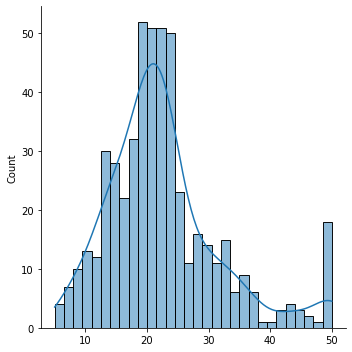

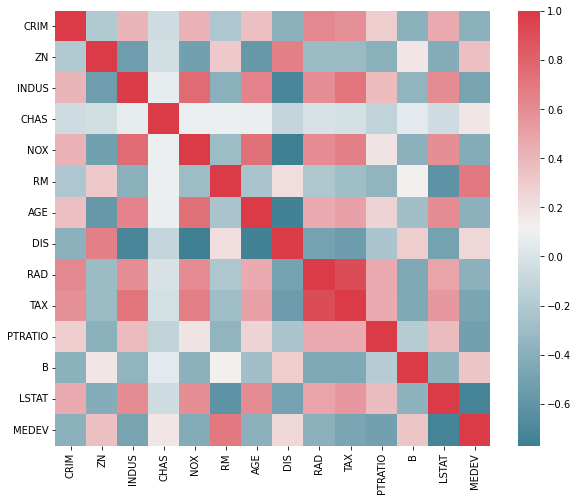

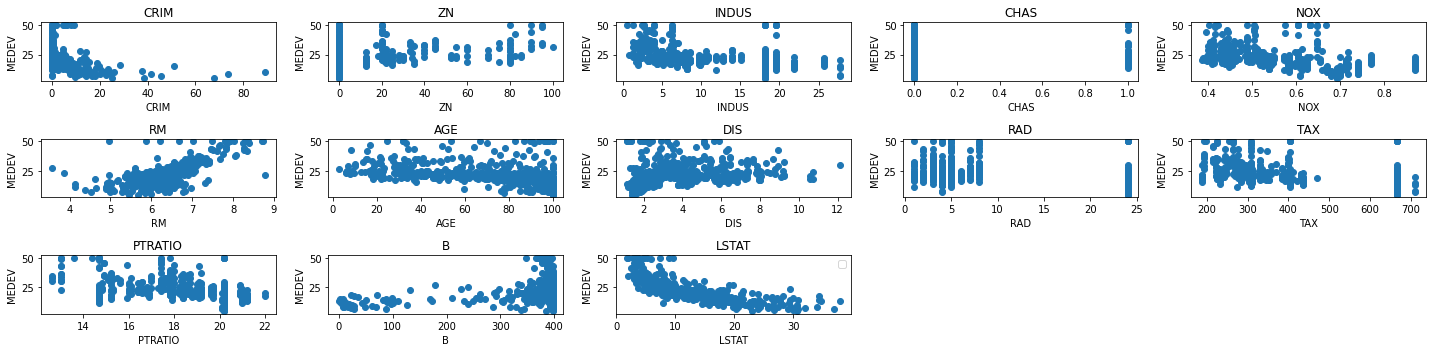

                 0
CRIM     -0.098758
ZN        0.047592
INDUS     0.094172
CHAS      1.374151
NOX     -13.733130
RM        4.122424
AGE      -0.013739
DIS      -1.344682
RAD       0.300187
TAX      -0.012450
PTRATIO  -1.072396
B         0.013111
LSTAT    -0.511481
Test set performance: MSE: 25.198335934343355, RMSE: 5.0197944115614295, MAE: 3.4695302650970556


In [418]:
main()

Q3